In [20]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

person = '6_20130712'
band = 'de'

tsne = []
for label in range(3):
    t0_degree, t1_degree, t2_degree = [], [], []
    
    for cnt in range(225):
        try:
            adj_matrix = np.load(f'/data/Anaiis/garage/adj_matrix/{person}-{band}-adj_matrix{cnt}-{label}.npy')
        except:
            continue
        degree = adj_matrix.mean(axis = 1)
        tsne.append(degree)
        t0_degree.append(degree[:62])
        t1_degree.append(degree[62: 124])
        t2_degree.append(degree[124:186])

    data_t0 = np.array(t0_degree)
    data_t1 = np.array(t1_degree)
    data_t2 = np.array(t2_degree)

    n_clusters = 5

    # 创建 KMeans 对象并进行拟合
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_t0)
    cluster_centers_t0 = kmeans.cluster_centers_
    kmeans.fit(data_t1)
    cluster_centers_t1 = kmeans.cluster_centers_
    kmeans.fit(data_t2)
    cluster_centers_t2 = kmeans.cluster_centers_
    print(f"label = {label}")
    print(cluster_centers_t0.argmax(axis=1))
    print(cluster_centers_t1.argmax(axis=1))
    print(cluster_centers_t2.argmax(axis=1))



/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


label = 0
[36 36 33 36 36]
[36 33 36 36 36]
[32 29 32 32 32]


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


label = 1
[36  1  2 36 36]
[36  1 64 36 36]
[32 32 32 32 32]


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


label = 2
[36 36 36 36 36]
[36 36 36 36 62]
[32 32 32 32 32]


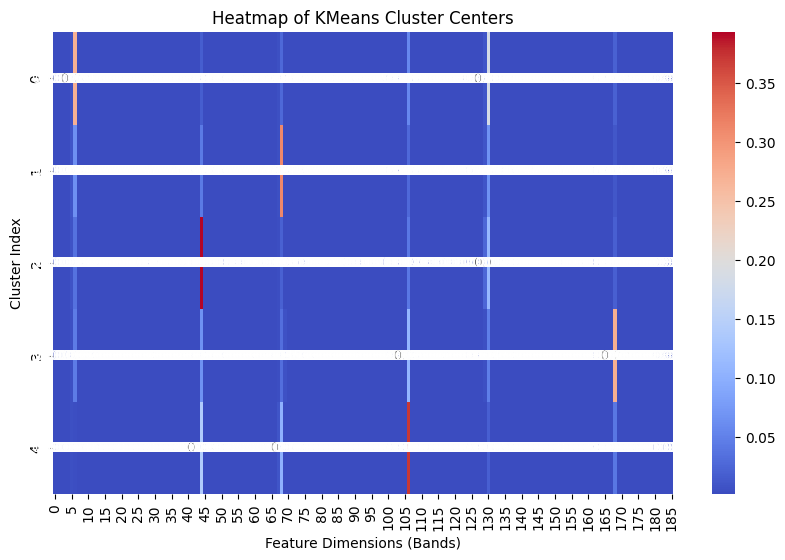

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 使用 seaborn 画热图
sns.heatmap(cluster_centers, annot=True, cmap="coolwarm", cbar=True)

# 添加标题和标签
plt.title('Heatmap of KMeans Cluster Centers')
plt.xlabel('Feature Dimensions (Bands)')
plt.ylabel('Cluster Index')

# 显示图像
plt.show()

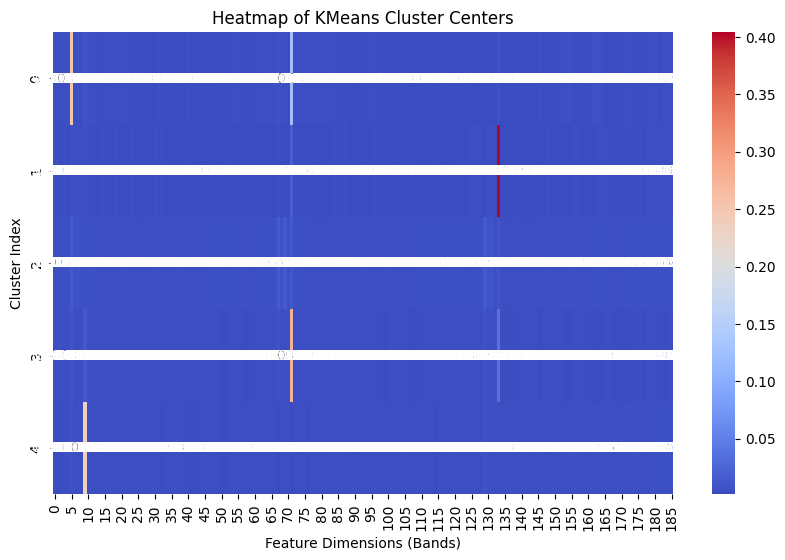

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 使用 seaborn 画热图
sns.heatmap(cluster_centers, annot=True, cmap="coolwarm", cbar=True)

# 添加标题和标签
plt.title('Heatmap of KMeans Cluster Centers')
plt.xlabel('Feature Dimensions (Bands)')
plt.ylabel('Cluster Index')

# 显示图像
plt.show()

# tSNE


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


num_labels = 3 
labels = np.array([0] * 75 + [1] * 75 + [2] * 75)
tsne_array = np.array(data_t0)
print(tsne_array.shape)
# tsne_1 = np.array(tsne_1)
# tsne_2 = np.array(tsne_2)
# data = np.concatenate((tsne_0, tsne_1, tsne_2), axis=0)
# 将(nodes, nodes)数据展平为nodes*nodes以便进行t-SNE降维

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(tsne_array)

# 可视化t-SNE结果
plt.figure(figsize=(8, 6))
for label in range(num_labels):
    plt.scatter(data_tsne[labels == label, 0], data_tsne[labels == label, 1], label=f'Label {label}')
    
plt.title('t-SNE Visualization for Each Label')
plt.legend()
plt.show()


(78, 62)


KeyboardInterrupt: 

In [24]:
data_t2.shape

(78, 58)

(1011, 512)


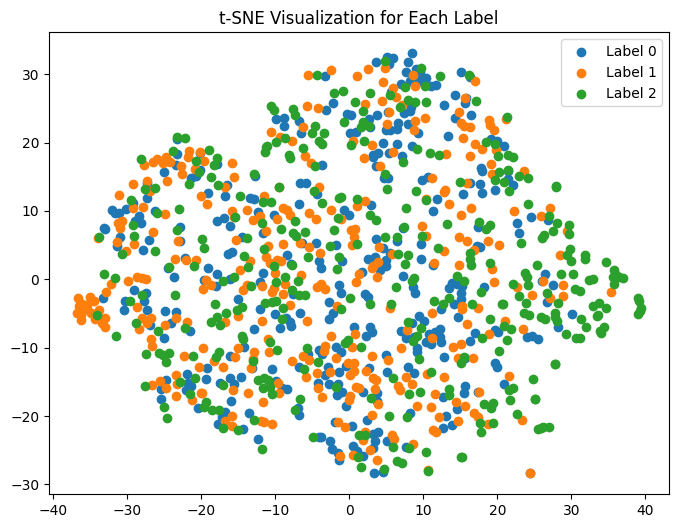

In [34]:
import torch

tsne_array = []
for i in range(1011):
    beta_feats = torch.load(f'/data/Anaiis/garage/vis_data/6_20130712/beta_feats_{i}.pt')
    beta_feats = beta_feats.cpu().numpy().mean(axis=0)
    tsne_array.append(beta_feats)
    # print("beta feats", beta_feats.shape)


num_labels = 3  # 三类标签

# 假设每个类别有num_samples // 3个样本，数据形状为(samples, nodes, nodes)
 
labels = np.load('/data/Anaiis/garage/vis_data/6_20130712/labels0924.npy')
tsne_array = np.array(tsne_array)
tsne_array = tsne_array.reshape((1011, -1))
print(tsne_array.shape)
# tsne_1 = np.array(tsne_1)
# tsne_2 = np.array(tsne_2)
# data = np.concatenate((tsne_0, tsne_1, tsne_2), axis=0)
# 将(nodes, nodes)数据展平为nodes*nodes以便进行t-SNE降维

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(tsne_array)

# 可视化t-SNE结果
plt.figure(figsize=(8, 6))
for label in range(num_labels):
    plt.scatter(data_tsne[labels == label, 0], data_tsne[labels == label, 1], label=f'Label {label}')
    
plt.title('t-SNE Visualization for Each Label')
plt.legend()
plt.show()

In [33]:
labels

array([1, 2, 0, ..., 1, 1, 0])

In [1]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

person = '15_20131105'
band = 'beta'

t0_degree, t1_degree, t2_degree = [], [], []

for cnt in range(1123):
    for label in range(3):
        try:
            adj_matrix = np.load(f'/data/Anaiis/garage/adj_matrix/{person}-{band}-adj_matrix{cnt}-{label}.npy')
        except:
            continue
        degree = adj_matrix.mean(axis=1)
        t0_degree.append(degree[:62])
        t1_degree.append(degree[62:124])
        t2_degree.append(degree[124:186])

# 转换为 numpy 数组
data_t0 = np.array(t0_degree)
data_t1 = np.array(t1_degree)
data_t2 = np.array(t2_degree)

# # 数据标准化
# scaler = StandardScaler()
# data_t0_scaled = scaler.fit_transform(data_t0)
# data_t1_scaled = scaler.fit_transform(data_t1)
# data_t2_scaled = scaler.fit_transform(data_t2)
# print(data_t0_scaled.shape)

# 寻找最优的聚类数，使用肘部法则或者轮廓系数
# def find_best_k(data, max_k=10):
#     sil_scores = []
#     for k in range(2, max_k):
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         labels = kmeans.fit_predict(data)
#         score = silhouette_score(data, labels)
#         sil_scores.append(score)
#     return sil_scores

# # 可视化肘部法则
# def plot_silhouette(sil_scores, label):
#     plt.figure(figsize=(8, 4))
#     plt.plot(range(2, len(sil_scores) + 2), sil_scores, marker='o')
#     plt.title(f'Silhouette Scores for {label}')
#     plt.xlabel('Number of Clusters')
#     plt.ylabel('Silhouette Score')
#     plt.show()

data_combined = np.vstack([data_t0, data_t1, data_t2])
print(data_combined.shape)
# # 获取最佳聚类数的轮廓系数
# sil_scores = find_best_k(data_combined)
# # 可视化轮廓系数变化
# plot_silhouette(sil_scores, 'sil_scores_combined')





(3369, 62)


In [2]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

person = '6_20130712'
band = 'beta'

t0_degree, t1_degree, t2_degree = [], [], []

for cnt in range(1123):
    for label in range(3):
        try:
            adj_matrix = np.load(f'/data/Anaiis/garage/adj_matrix/{person}-{band}-adj_matrix{cnt}-{label}.npy')
        except:
            continue
        degree = adj_matrix.mean(axis=1)
        t0_degree.append(degree[:62])
        t1_degree.append(degree[62:124])
        t2_degree.append(degree[124:186])

# 转换为 numpy 数组
data_t0 = np.array(t0_degree)
data_t1 = np.array(t1_degree)
data_t2 = np.array(t2_degree)

# # 数据标准化
# scaler = StandardScaler()
# data_t0_scaled = scaler.fit_transform(data_t0)
# data_t1_scaled = scaler.fit_transform(data_t1)
# data_t2_scaled = scaler.fit_transform(data_t2)
# print(data_t0_scaled.shape)

# 寻找最优的聚类数，使用肘部法则或者轮廓系数
# def find_best_k(data, max_k=10):
#     sil_scores = []
#     for k in range(2, max_k):
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         labels = kmeans.fit_predict(data)
#         score = silhouette_score(data, labels)
#         sil_scores.append(score)
#     return sil_scores

# # 可视化肘部法则
# def plot_silhouette(sil_scores, label):
#     plt.figure(figsize=(8, 4))
#     plt.plot(range(2, len(sil_scores) + 2), sil_scores, marker='o')
#     plt.title(f'Silhouette Scores for {label}')
#     plt.xlabel('Number of Clusters')
#     plt.ylabel('Silhouette Score')
#     plt.show()

data_combined2 = np.vstack([data_t0, data_t1, data_t2])
print(data_combined2.shape)
# # 获取最佳聚类数的轮廓系数
# sil_scores = find_best_k(data_combined)
# # 可视化轮廓系数变化
# plot_silhouette(sil_scores, 'sil_scores_combined')

data_combined = np.concatenate([data_combined, data_combined2])



(3369, 62)


In [3]:
data_combined.shape

(6738, 62)

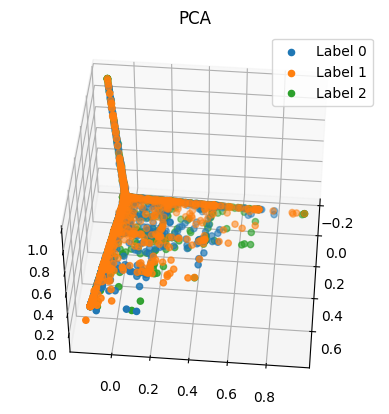

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_combined)
labels = np.load("/data/Anaiis/garage/vis_data/6_20130712/labels0924.npy")
labels = np.concatenate([labels, labels, labels,labels,labels,labels])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(labels):
    ax.scatter(data_pca[labels == label, 0], data_pca[labels == label, 1], data_pca[labels == label, 2],
               label=f'Label {label}')

ax.set_title('PCA')
ax.view_init(elev=45, azim=5)
ax.legend(loc='upper right')# plt.colorbar(scatter)
plt.show()

In [26]:
# 定义聚类数（可以根据具体需求调整）
for n in range(2, 10):
    spectral = SpectralClustering(n_clusters=n, affinity='nearest_neighbors', random_state=42)
    cluster_labels = spectral.fit_predict(data_pca)
    print(silhouette_score(data_pca, cluster_labels))


0.27051890156018554
0.2836292866589745
0.44641314287175315
0.5180927890336696
0.4721804281254664
0.42884844562701563
0.3895463654818201
0.3436047176128665


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# 聚类方法列表
clustering_algorithms = {
    'SpectralClustering': SpectralClustering,
    'KMeans': KMeans,
    'AgglomerativeClustering': AgglomerativeClustering
}

# 尝试不同聚类方法并计算 silhouette score
for name, algorithm in clustering_algorithms.items():
    print(f"\n{name}:")
    for n in range(2, 15):
        if name == 'SpectralClustering':
            model = algorithm(n_clusters=n, affinity='nearest_neighbors', random_state=42)
        else:
            model = algorithm(n_clusters=n)

        cluster_labels = model.fit_predict(data_combined)
        score = silhouette_score(data_combined, cluster_labels)
        print(f"n_clusters = {n}, silhouette score = {score}")

# 另外尝试DBSCAN聚类
print("\nDBSCAN:")
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(data_combined)

# 计算 DBSCAN 的 silhouette score（仅当聚类标签不全为同一类时有效）
if len(set(cluster_labels)) > 1:
    score = silhouette_score(data_combined, cluster_labels)
    print(f"silhouette score = {score}")
else:
    print("DBSCAN 未能找到足够多的聚类")




SpectralClustering:


n_clusters = 2, silhouette score = 0.6263380401059097
n_clusters = 3, silhouette score = 0.5216286227390389
n_clusters = 4, silhouette score = 0.6079313851998337
n_clusters = 5, silhouette score = 0.6340503193320791
n_clusters = 6, silhouette score = 0.584415050178781
n_clusters = 7, silhouette score = 0.5947069946861
n_clusters = 8, silhouette score = 0.5908559076629566
n_clusters = 9, silhouette score = 0.01939866651345266
n_clusters = 10, silhouette score = 0.05252075565141101
n_clusters = 11, silhouette score = 0.027319376931475816
n_clusters = 12, silhouette score = 0.047220314535266636
n_clusters = 13, silhouette score = 0.0407188746367904
n_clusters = 14, silhouette score = 0.11333434859301492

KMeans:


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 2, silhouette score = 0.5301836014995275


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 3, silhouette score = 0.5975216206159869


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 4, silhouette score = 0.6231494107055442


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 5, silhouette score = 0.6402903905066724


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 6, silhouette score = 0.5985014665244854


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 7, silhouette score = 0.6086461937747143


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 8, silhouette score = 0.6158522406902022


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 9, silhouette score = 0.6335799955196059


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 10, silhouette score = 0.644551621528363


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 11, silhouette score = 0.6475006962228658


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 12, silhouette score = 0.6523966344461731


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 13, silhouette score = 0.6495551012432312


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_clusters = 14, silhouette score = 0.6538690206615622

AgglomerativeClustering:
n_clusters = 2, silhouette score = 0.49162798119057777
n_clusters = 3, silhouette score = 0.5590509088661632
n_clusters = 4, silhouette score = 0.5826851887178855
n_clusters = 5, silhouette score = 0.5998586253596633
n_clusters = 6, silhouette score = 0.5747965263035079
n_clusters = 7, silhouette score = 0.5725458467144586
n_clusters = 8, silhouette score = 0.5783271928161381
n_clusters = 9, silhouette score = 0.5886785654640816
n_clusters = 10, silhouette score = 0.6046911501033864
n_clusters = 11, silhouette score = 0.6052329422316423
n_clusters = 12, silhouette score = 0.6103919338295375
n_clusters = 13, silhouette score = 0.6132129675235614
n_clusters = 14, silhouette score = 0.6189628861045471

DBSCAN:
DBSCAN 未能找到足够多的聚类


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

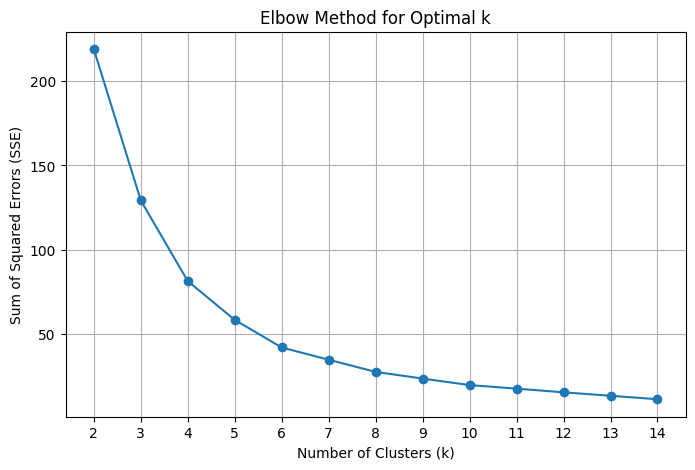

In [15]:
sse = []
k_range = range(2, 15) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=929)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)  # 计算每个 k 的 SSE

# 绘制肘部图
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.grid()
plt.show()

In [44]:
print(cluster_labels.shape)
labels = np.load("/data/Anaiis/garage/vis_data/15_20131105/labels0924.npy")

(3369,)


In [45]:
np.save(f'{person}-{band}-cluster_labels.npy', cluster_labels)

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

n_clusters = 5  # 可以根据需要调整

# 创建一个 KMeans 聚类器并进行聚类
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_pca)
np.save(f'6and15-{band}-cluster_labels-km{n_clusters}.npy', cluster_labels)

# # 使用 t-SNE 将数据降到 2 维，以便可视化
# tsne = TSNE(n_components=2, random_state=42)
# data_2d = tsne.fit_transform(data_combined)

# # 可视化 t-SNE 结果，并根据聚类标签显示不同的颜色
# plt.figure(figsize=(10, 8))
# palette = sns.color_palette("hsv", n_clusters)
# sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=cluster_labels, palette=palette, legend='full', s=100)
# plt.title(f'Cluster Visualization with t-SNE (n_clusters={n_clusters})')
# plt.xlabel('t-SNE dimension 1')
# plt.ylabel('t-SNE dimension 2')
# plt.legend(title='Cluster')
# plt.show()


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
len(np.concatenate([labels, labels, labels]))

675

/tmp/ipykernel_3596500/3238679907.py:3: UserWarning: The palette list has more values (15) than needed (3), which may not be intended.
  sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=np.concatenate([labels, labels, labels]), palette=palette, legend='full', s=100)


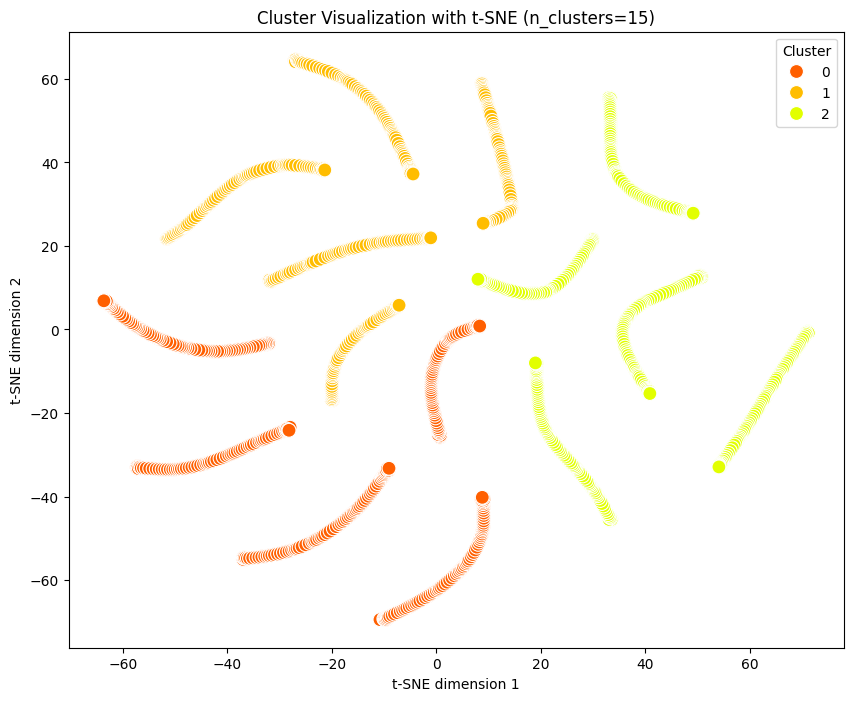

In [37]:
plt.figure(figsize=(10, 8))
palette = sns.color_palette("hsv", n_clusters)
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=np.concatenate([labels, labels, labels]), palette=palette, legend='full', s=100)
plt.title(f'Cluster Visualization with t-SNE (n_clusters={n_clusters})')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.legend(title='Cluster')
plt.show()

In [13]:
labels*3

array([6, 6, 6, ..., 0, 0, 0])

In [7]:
cluster_labels[77:156]

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 2, 2, 2, 2, 0, 1, 4, 0,
       4, 4, 1, 4, 4, 4, 3, 4, 4, 4, 0, 0, 1, 4, 0, 4, 0, 3, 1, 1, 1, 1,
       0, 3, 3, 1, 0, 1, 1, 1, 0, 1, 0, 3, 4, 2, 4, 1, 3, 3, 2, 1, 3, 1,
       0, 1, 1, 4, 3, 1, 1, 1, 0, 0, 1, 4, 0], dtype=int32)

In [15]:
labels = np.load("/data/Anaiis/garage/vis_data/6_20130712/labels0924.npy")

In [16]:
labels[:78]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
labels[78:155]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## 分析聚类趋势

In [18]:
import numpy as np
import matplotlib.pyplot as plt

person = "6and15"
band = "beta"
subj6 = np.load(f"{person}-{band}-cluster_labels-km5.npy")
# person = "15_20131105"
# subj15 = np.load(f"{person}-{band}-cluster_labels-pca-km6.npy")

In [9]:
subj6 = subj6.reshape((1123, 3))

ValueError: cannot reshape array of size 6738 into shape (1123,3)

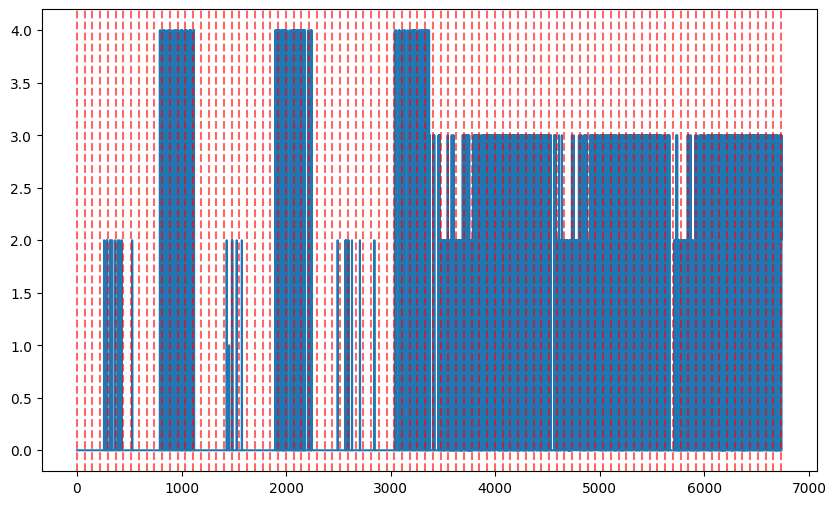

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(subj6, label='Random Data')
# for x in range(0, len(subj6), 74):
#     ax.axvline(x=x, color='red', linestyle='--', alpha=0.6)

# [1, 0, -1, -1, 0, 1, -1, 0, 1, 1, 0, -1, 0, 1, -1]


In [29]:
len(np.where(np.diff(labels) != 0)[0])

12

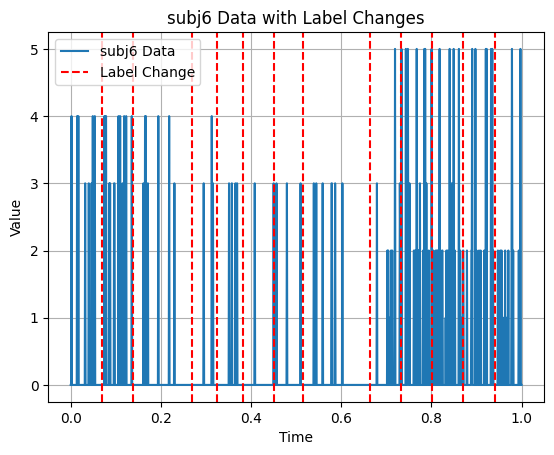

In [24]:
subj8 = subj8[:1123]
change_points = np.where(np.diff(labels) != 0)[0] + 1  # 计算标签变化的点
time = np.linspace(0, 1, len(subj8))
# 绘制 subj6 数据
plt.figure()
plt.plot(time, subj8, label='subj6 Data')

# 在标签变化的地方绘制竖线
for point in change_points:
    plt.axvline(x=time[point], color='red', linestyle='--', label='Label Change' if point == change_points[0] else "")

plt.title('subj6 Data with Label Changes')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
# [1, 0, -1, -1, 0, 1, -1, 0, 1, 1, 0, -1, 0, 1, -1]


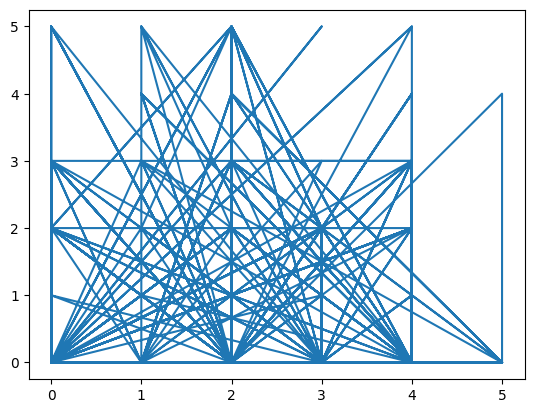

In [26]:
plt.plot(subj6, subj8)